### Compilação das bases de benefícios concedidos entre jan/2019 e dez/2020

In [ ]:
# Carregando alguns módulos essenciais para trabalharmos os dados

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import scipy.stats as st
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Algumas opções do Pandas boas para vermos muitas linhas e colunas de uma vez
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999


In [ ]:
# Carregando os dados de 2019 no df dados_2019

from glob import glob
files = sorted(glob('concedidos-*-2019.csv'))

dados_2019 = pd.concat((pd.read_csv(file,
                       sep = ";",
                       header = 0,
                       index_col = False,
                       encoding = "cp1252") for file in files), ignore_index=True)

In [93]:
# Carregando os dados de 2020 no df dados_2020
files = sorted(glob('beneficios-concedidos-*-2020.csv'))
dados_2020 = pd.concat((pd.read_csv(file,
                       sep = ";",
                       header = 0,
                       index_col = False,
                       encoding = None) for file in files), ignore_index=True)

In [98]:
#Unindo os df de cada ano no df_benef
df_benef = dados_2019.append(dados_2020 , ignore_index=True)

In [101]:
df_benef.columns

Index(['Competência concessão', 'Espécie', 'CID', 'CID.1', 'Despacho',
       'Dt Nascimento', 'Sexo.', 'Clientela', 'Mun Resid',
       'Vínculo dependentes', 'Forma Filiação', 'UF', 'Qt SM RMI', 'CID_1',
       'mandar continuar, obrigado.'],
      dtype='object')

In [102]:
df_benef.head()

,Competência concessão,Espécie,CID,CID.1,Despacho,Dt Nascimento,Sexo.,Clientela,Mun Resid,Vínculo dependentes,Forma Filiação,UF,Qt SM RMI,CID_1,"mandar continuar, obrigado."
0,janeiro/2019,Auxílio Doenca Previdenciário,I83,I83 Varizes dos Membros Infer,Concessao Normal,25/10/1967,Feminino,Urbano,02003-AL-Arapiraca,Filho,Empregado,Alagoas,"1,068",NaN,NaN
1,janeiro/2019,Auxílio Doenca Previdenciário,S525,S52.5 Frat da Extremidade Distal do Radio,Conc. Base Artigo 27 Inciso Ii do Rbps,16/05/1994,Masculino,Urbano,02003-AL-Arapiraca,Não Informado,Empregado,Alagoas,"1,099",NaN,NaN
2,janeiro/2019,Auxílio Doenca Previdenciário,N811,N81.1 Cistocele,Concessao Normal,03/03/1967,Feminino,Urbano,02003-AL-Arapiraca,Não Informado,Autônomo,Alagoas,"1,000",NaN,NaN
3,janeiro/2019,Auxílio Doenca Previdenciário,O200,O20.0 Ameaca de Aborto,Concessao Normal,06/09/1986,Feminino,Urbano,02003-AL-Arapiraca,Filho,Desempregado,Alagoas,"1,000",NaN,NaN
4,janeiro/2019,Auxílio Doenca Previdenciário,K80,K80 Colelitiase,Concessao Normal,23/06/1983,Feminino,Urbano,02003-AL-Arapiraca,Filho,Empregado,Alagoas,"1,728",NaN,NaN


In [103]:
#Dropando as últimas colunas
df_benef.drop(['CID_1', 'mandar continuar, obrigado.'], axis=1, inplace = True)

In [104]:
#Removendo as linhas cujas espécie não relação com Acidente de Trabalho

df_benef = df_benef.loc[(df_benef['Espécie'] == 'Auxílio Doenca por Acidente do Trabalho')|
                              (df_benef['Espécie'] == 'Aposent. Invalidez Acidente Trabalho')]

In [105]:
df_benef.shape

(282520, 13)

In [106]:
df_benef.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282520 entries, 27 to 10103532
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Competência concessão  270216 non-null  object
 1   Espécie                282520 non-null  object
 2   CID                    282520 non-null  object
 3   CID.1                  206065 non-null  object
 4   Despacho               282520 non-null  object
 5   Dt Nascimento          282520 non-null  object
 6   Sexo.                  282520 non-null  object
 7   Clientela              146719 non-null  object
 8   Mun Resid              282520 non-null  object
 9   Vínculo dependentes    282520 non-null  object
 10  Forma Filiação         282520 non-null  object
 11  UF                     282520 non-null  object
 12  Qt SM RMI              282520 non-null  object
dtypes: object(13)
memory usage: 30.2+ MB


In [107]:
#Salvando o dataframe
df_benef.to_csv('benef_AcidenteTrabalho_raw.csv')

In [7]:
#Lendo o arquivo para continuar o trabalho
df_benef = pd.read_csv('benef_AcidenteTrabalho_raw.csv',
                       header = 0,
                       names = ['competencia', 'especie', 'cid', 'cid.1', 'despacho',
                               'dt_nasc', 'sexo.', 'clientela', 'mun_resid',
                               'vinculo_depend', 'forma_filiacao', 'uf', 'qt_sm_rmi'], 
                       index_col = 0,
                       encoding = None)


In [8]:
df_benef.head()

,competencia,especie,cid,cid.1,despacho,dt_nasc,sexo.,clientela,mun_resid,vinculo_depend,forma_filiacao,uf,qt_sm_rmi
27,janeiro/2019,Auxílio Doenca por Acidente do Trabalho,M75,M75 Lesoes do Ombro,Concessao Normal,04/06/1978,Feminino,Urbano,02043-AL-Maceió,Filho,Empregado,Alagoas,"1,000"
33,janeiro/2019,Auxílio Doenca por Acidente do Trabalho,T92,T92 Sequelas de Traum do Membro Super,Concessao Normal,16/04/1987,Masculino,Urbano,02043-AL-Maceió,Não Informado,Empregado,Alagoas,"1,382"
35,janeiro/2019,Auxílio Doenca por Acidente do Trabalho,M544,M54.4 Lumbago c/Ciatica,Concessao Normal,01/01/1969,Masculino,Urbano,02023-AL-Coruripe,Não Informado,Empregado,Alagoas,"1,331"
41,janeiro/2019,Auxílio Doenca por Acidente do Trabalho,M544,M54.4 Lumbago c/Ciatica,Concessao Normal,10/10/1974,Masculino,Urbano,02003-AL-Arapiraca,Não Informado,Desempregado,Alagoas,"1,461"
47,janeiro/2019,Auxílio Doenca por Acidente do Trabalho,T922,T92.2 Sequelas de Frat ao Nivel do Punho e Da,Concessao Normal,19/05/1984,Masculino,Urbano,02043-AL-Maceió,Não Informado,Empregado,Alagoas,"1,445"


In [24]:
#Verificando dados com valores estranhos nas colunas e marcando eles como NaN

df_benef['qt_sm_rmi'].value_counts(sort = True)

1,000    34150
1        15451
1,191      295
1,239      284
1,196      282
         ...  
5,600        1
5,333        1
4,64         1
5,892        1
4,77         1
Name: qt_sm_rmi, Length: 4929, dtype: int64

In [12]:
subst = "000000"
df_benef.cid.replace(subst, np.nan, inplace = True)

In [25]:
df_benef.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282520 entries, 27 to 10103532
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   competencia     270216 non-null  object
 1   especie         282520 non-null  object
 2   cid             274564 non-null  object
 3   cid.1           206065 non-null  object
 4   despacho        282520 non-null  object
 5   dt_nasc         282520 non-null  object
 6   sexo.           282520 non-null  object
 7   clientela       146719 non-null  object
 8   mun_resid       282520 non-null  object
 9   vinculo_depend  282520 non-null  object
 10  forma_filiacao  282520 non-null  object
 11  uf              282520 non-null  object
 12  qt_sm_rmi       282520 non-null  object
dtypes: object(13)
memory usage: 30.2+ MB


In [26]:
#Salvando o dataframe com os valores nulos marcados
df_benef.to_csv('benef_AcidenteTrabalho_com_NaNs.csv')

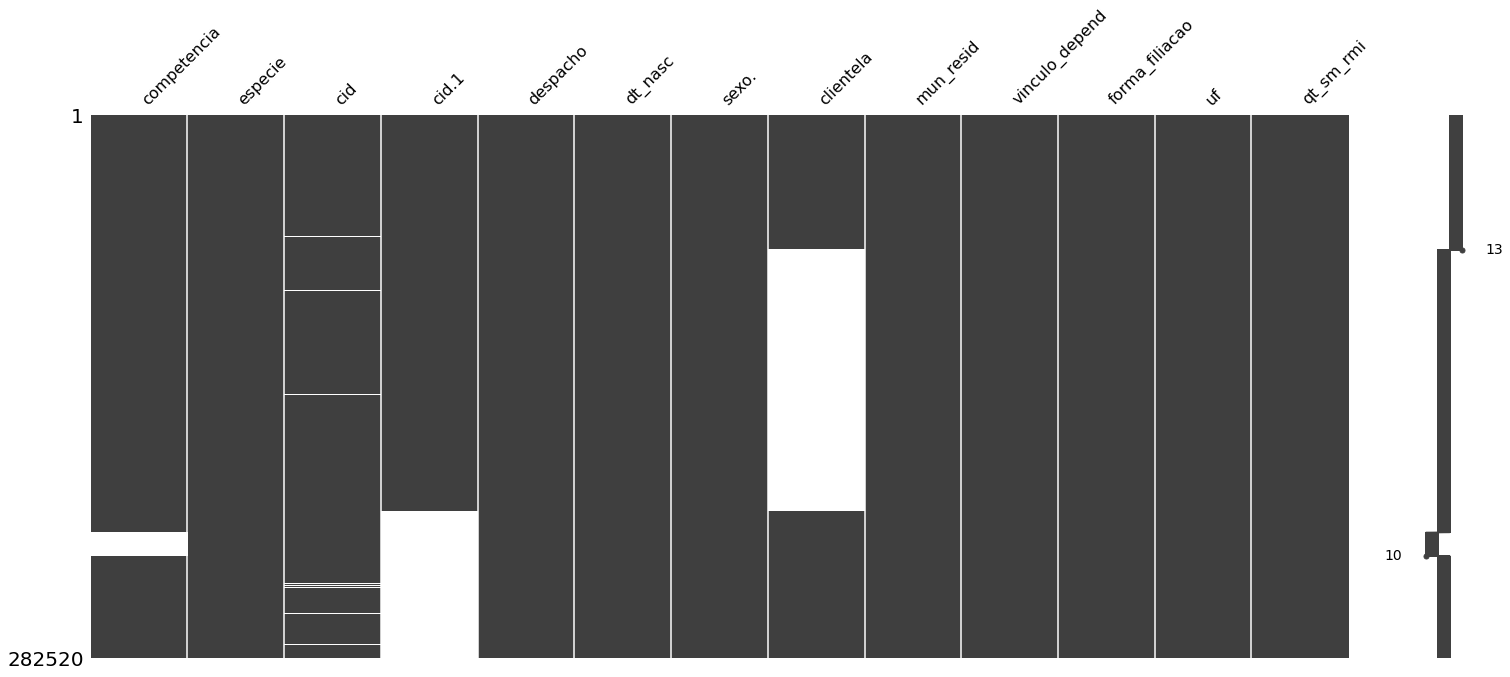

In [27]:
#Verificando a distribuição dos valores nulos

import missingno as msno
msno.matrix(df_benef)
plt.show()

In [28]:
#Dropando as linhas com valores nulos na coluna cid
df_benef = df_benef[df_benef['cid'].notna()]

In [30]:
#Transformando a variável de valor do benefício em numérica

df_benef["qt_sm_rmi"] = df_benef["qt_sm_rmi"].str.replace(",",".")

df_benef["qt_sm_rmi"] = df_benef.qt_sm_rmi.astype(float)


In [31]:
df_benef.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274564 entries, 27 to 10103479
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   competencia     262568 non-null  object 
 1   especie         274564 non-null  object 
 2   cid             274564 non-null  object 
 3   cid.1           202200 non-null  object 
 4   despacho        274564 non-null  object 
 5   dt_nasc         274564 non-null  object 
 6   sexo.           274564 non-null  object 
 7   clientela       141419 non-null  object 
 8   mun_resid       274564 non-null  object 
 9   vinculo_depend  274564 non-null  object 
 10  forma_filiacao  274564 non-null  object 
 11  uf              274564 non-null  object 
 12  qt_sm_rmi       274564 non-null  float64
dtypes: float64(1), object(12)
memory usage: 29.3+ MB


In [26]:
#Salvando o dataframe sem os valores nulos
df_benef.to_csv('benef_AcidenteTrabalho_sem_NaNs.csv')

In [2]:
#Lendo o arquivo para continuar o trabalho
df_benef = pd.read_csv('benef_AcidenteTrabalho_sem_NaNs.csv',
                       header = 0,
                       names = ['competencia', 'especie', 'cid', 'cid.1', 'despacho',
                               'dt_nasc', 'sexo', 'clientela', 'mun_resid',
                               'vinculo_depend', 'forma_filiacao', 'uf', 'qt_sm_rmi'], 
                       index_col = 0,
                       encoding = None)

In [3]:
df_benef.head()

,competencia,especie,cid,cid.1,despacho,dt_nasc,sexo,clientela,mun_resid,vinculo_depend,forma_filiacao,uf,qt_sm_rmi
27,janeiro/2019,Auxílio Doenca por Acidente do Trabalho,M75,M75 Lesoes do Ombro,Concessao Normal,04/06/1978,Feminino,Urbano,02043-AL-Maceió,Filho,Empregado,Alagoas,1.000
33,janeiro/2019,Auxílio Doenca por Acidente do Trabalho,T92,T92 Sequelas de Traum do Membro Super,Concessao Normal,16/04/1987,Masculino,Urbano,02043-AL-Maceió,Não Informado,Empregado,Alagoas,1.382
35,janeiro/2019,Auxílio Doenca por Acidente do Trabalho,M544,M54.4 Lumbago c/Ciatica,Concessao Normal,01/01/1969,Masculino,Urbano,02023-AL-Coruripe,Não Informado,Empregado,Alagoas,1.331
41,janeiro/2019,Auxílio Doenca por Acidente do Trabalho,M544,M54.4 Lumbago c/Ciatica,Concessao Normal,10/10/1974,Masculino,Urbano,02003-AL-Arapiraca,Não Informado,Desempregado,Alagoas,1.461
47,janeiro/2019,Auxílio Doenca por Acidente do Trabalho,T922,T92.2 Sequelas de Frat ao Nivel do Punho e Da,Concessao Normal,19/05/1984,Masculino,Urbano,02043-AL-Maceió,Não Informado,Empregado,Alagoas,1.445


In [3]:
df_benef.shape

(268766, 13)

In [21]:
df_benef.loc[df_benef['cid'] == '      '].loc[df_benef['despacho'] == 'Concessao Normal'].cid.count()

63

In [22]:
#Verificado que haviam ainda 5798 ocorrências de CID em branco na base de benefícios destes apenas 63 não eram revisões
#administrativas ou judiciais. Como é uma parcela mínima serão removidos

df_benef.drop(df_benef[df_benef.cid == '      '].index, inplace=True)

In [23]:
df_benef.shape

(268766, 13)

In [24]:
#Verificando o valor mensal de benefício segunda cada CID
df_benef.groupby(["cid"]).mean()

,qt_sm_rmi
cid,
00T932,1.141000
A000,1.000000
A001,1.203000
A04,1.065000
A09,1.082000
...,...
Z967,1.555000
Z97,1.000000
Z98,1.674886


In [ ]:
#Salvando o dataframe sem os valores nulos
df_benef.to_csv('benef_AcidenteTrabalho_sem_NaNs.csv')